# Das Standardbeispiel für neuronale Netzwerke
## Erkennen von handgeschriebenen Ziffern
MNIST ist eine Datenbank, in der zehntausende handgeschriebene Zahlen eingescannt und bezeichnet sind. Diese Daten eignen sich zum Trainieren und Testen von neuronalen Netzwerken

[Link zum Wiki](https://de.wikipedia.org/wiki/MNIST-Datenbank)<br>
[Link zur Datenbank](https://yann.lecun.com/exdb/mnist/)

In [57]:
import  mnist_loader
from matplotlib import pyplot as plt
import network
import numpy as np

In [58]:
training_data,validation_data,test_data = mnist_loader.load_data_wrapper()

In [59]:
training_data=list(training_data)
validation_data=list(validation_data)
test_data=list(test_data)

In [60]:
print(len(training_data))
print(len(validation_data))
print(len(test_data))

50000
10000
10000


Aus der Dokumentation der MNIST-Datenbank kann man erfahren, dass die Ziffern als 28x28 Graustufenbilder gespeichert sind.

**Erste Aufgabe:** Mache Beispiele der Trainingsdaten und deren Label sichtbar. Gib zum Beispiel 10 zufällige Datenbeispiele aus. (Warnung: Das resizing zerstört die Daten. Zum Netzwerktraining Daten neu laden.)

In [54]:
i=38
print(training_data[i])
#print(training_data[i][1])
training_data[i][0].resize(28,28)
# print(training_data[i][0])

(array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.  

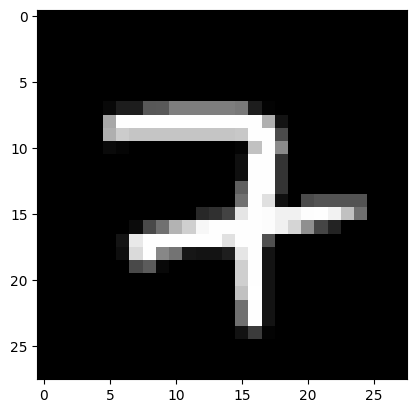

label:
 [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]]


In [55]:
plt.imshow(training_data[i][0], cmap='gray', vmin=0, vmax=1)
plt.show()
print("label:\n",training_data[i][1])

**Zweite Aufgabe:** Schreibe eine kleine Funktion, die statt des Arrays, die entsprechende Ziffer zurückgibt.

In [18]:
def label(array):
    for i in range(10):
        if array[i]==1:
            return i

In [19]:
label(training_data[i][1])

4

## Erstellung eines Netzwerks, Training und Test
Ihr werdet gleich im Video sehen, was ein neuronales Netzwerk ist. Für den Moment ist es eine Black-Box, die 28x28=784 Grauwerte einliest und eine Zahl zwischen 0 und 9 wieder ausspuckt. Dafür benötigt das Netzwerk 784 Eingänge und 10 Ausgänge. Zusätzlich fügen wir noch 30 interne Gehirnzellen hinzu, die das Netzwerk komplexer und leistungsfähiger machen.

In [68]:
net = network.Network([784,30,10])
net.SGD(training_data, epochs = 3,mini_batch_size= 10,eta = 3.0, test_data=test_data)

Epoch 0 : 8841 / 10000
Epoch 1 : 9177 / 10000
Epoch 2 : 9288 / 10000


Wir testen einfach mal, wie gut das Netzwerk unsere Zahlen erkennen kann.

In [69]:
net.evaluate(validation_data)

9301

In [72]:
# Finde Falschklassifizierungen
for i in range(0,400):
    ergebnis = np.argmax(net.feedforward(training_data[i][0]))
    lbl  = label(training_data[i][1])
    if ergebnis!=lbl:
        print(i,ergebnis,lbl)

48 5 9
80 0 9
109 6 2
132 3 5
134 4 1
138 2 5
148 4 7
160 6 8
172 7 9
207 2 3
224 7 1
262 6 2
268 7 2
278 2 5
304 7 9
344 4 9
346 3 9
374 4 9
391 3 2


In [75]:
net.feedforward(training_data[48][0])

array([[6.76204960e-03],
       [4.47254381e-04],
       [1.26243341e-05],
       [3.36865821e-02],
       [2.12410339e-05],
       [3.85802725e-01],
       [8.97348232e-04],
       [6.70051934e-04],
       [3.41669097e-02],
       [4.77499528e-06]])